In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''Downlaod haberman.csv from https://drive.google.com/file/d/1o1I9PLyjqGgs0eOylK-2srXM2ZH3mIVb/view'''
#Load haberman.csv into a pandas dataFrame.
Haber = pd.read_csv("haberman.csv ")

#Lets divide the dataset based on two classes as follows

#Status1 dataset with only status 1 included.
Haber_S1 = pd.read_csv("Haber_S1.csv ")
#Status2 dataset with only status 2 included.
Haber_S2 = pd.read_csv("Haber_S2.csv ")

In [106]:
#The number of points in the data set
print (Haber.shape)

(306, 4)


In [107]:
#No of features and classes of the dataset
print (Haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [108]:
#The data point of age feature in the dataset
Haber["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [109]:
#The data point of year feature in the dataset
Haber["year"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [110]:
#The data point of nodes feature in the dataset
Haber["nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [111]:
#The data point of "status" class in the dataset
Haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Project Objective:-

####   1) Our objective is to perform exploratory data analysis of the Breast cancer operations performed on patients between the year 1958-1969.
#### 2) Our objective is to check the survival status of the patients who underwent operations between 1958-1969.
#### 3) Our objective is to analyse if the patients who underwent breast cancer operation survived for more than 5 year or less than that  taking age, lymph nodes, survival status and years into consideration.
#### 4) From the data we have survival rate as 1 for patients who survived for >=5 years and survival rate as 2 for patients who survived for <5 years.



#### 1.1 1-D scatter plot of nodes

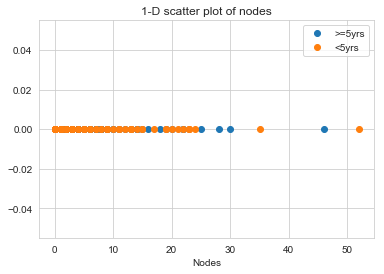

In [112]:

import numpy as np

plt.plot(Haber_S1["nodes"], np.zeros_like(Haber_S1['status']), 'o',label=">=5yrs")
plt.plot(Haber_S2["nodes"], np.zeros_like(Haber_S2['status']), 'o',label="<5yrs")
plt.title('1-D scatter plot of nodes')
plt.xlabel("Nodes")
plt.legend()
# plt.ylabel()
plt.show("status")

#### Disadvantages of 1-D scatter plot: Very hard to make sense since they overlap a lot.


#### 1.2 2-D scatter plot of age vs Nodes

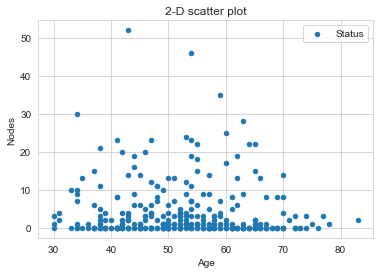

In [113]:
#:
 
Haber.plot(kind='scatter', x='age', y='nodes',label="Status") ;
plt.title('2-D scatter plot')
plt.xlabel("Age")
plt.ylabel("Nodes")
plt.legend()
plt.show()




#### 1) We can see that majority of patients are having around <5 nodes.
#### 2) We need to classify the categories using the colour.

#### 1.3 2-D Scatter plot with color-coding for age vs nodes feature/class.

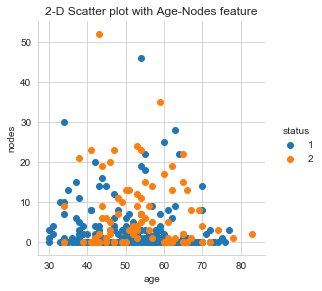

In [114]:
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(Haber, hue="status", height=4, margin_titles=True) \
   .map(plt.scatter,"age","nodes") \
   .add_legend();
plt.title("2-D Scatter plot with Age-Nodes feature")
plt.show();

#### 1) We can see that the majority of blue points(patients) falling between age (30-40 and 50-60) and having less than 5 nodes survived for >=5yrs.
#### 2) But Blue and orange data points cant be easily classified since they overlap.
#### 3) Lets draw multiple 2-D scatter plots for each combination of remaining features in the dataset.
#### 4)Since both the categories are not easily separable we will have to try pair plots.

#### 1.4 Pair plots taking the three features(age,year and nodes) and excluding the status class

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


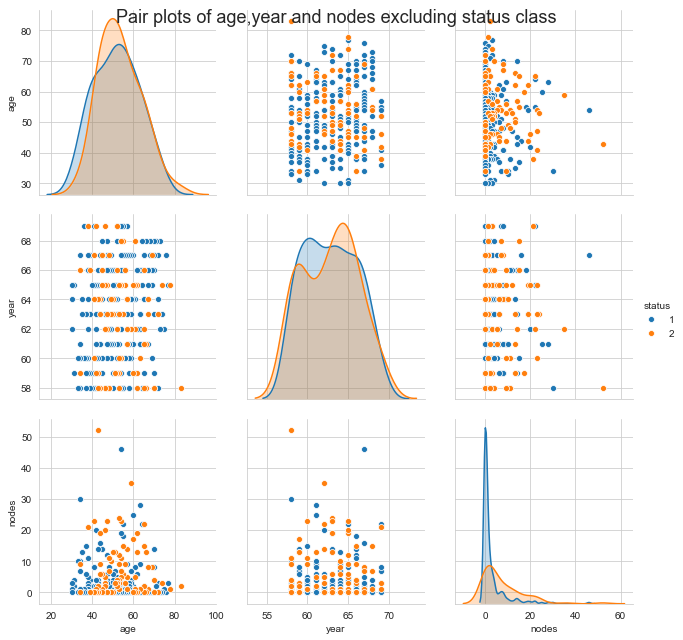

In [115]:
#Lets plot Pair plots taking the three features and excluding the status class

plt.close();
sns.set_style("whitegrid");

x=sns.pairplot(Haber, hue="status",vars=["age","year","nodes"], height=3);
x.fig.suptitle("Pair plots of age,year and nodes excluding status class",fontsize=18)
# plt.xlabel("Age")
# plt.ylabel("Nodes")
# plt.legend()
plt.show()

#### 1)We can note in (nodes/age axis) that higher %age of patients between age (40-60 & 60-80) had <5 nodes but the points overlap.
#### 2)We can note in (year/node axis) that higher %age of patients who had less than around 10 nodes  survived for <5yrs post operation.
#### 3)But we can only get the density of the nodes and not the count or percentage of nodes.
#### 4)We will have to plot histogram taking each feature, inorder to get a better insight about the data.

#### 1.5 Plotting histogram taking age into consideration

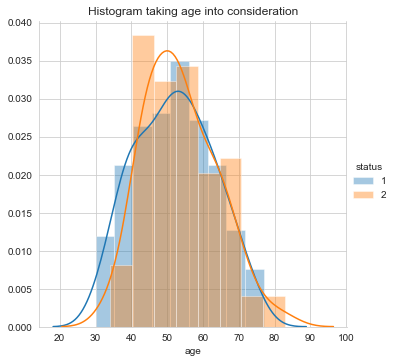

In [116]:
#Plotting histogram taking age into consideration

sns.FacetGrid(Haber, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram taking age into consideration")
plt.show();

#### We cant classify using the above plot since they overlap.

#### 1.6 Plotting histogram taking nodes into consideration

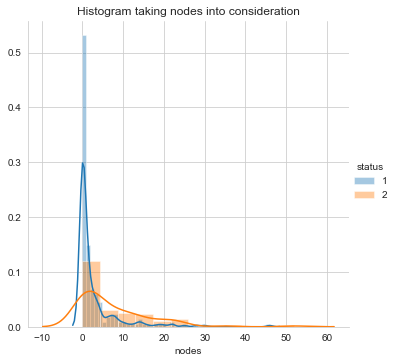

In [117]:
#Plotting histogram taking nodes into consideration

sns.FacetGrid(Haber, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
# plt.ylim(0, 100)
plt.title("Histogram taking nodes into consideration")
plt.show();
# ax.set(xlim=(0, 100))


#### 1)We can see that the patients having <5 nodes are high in number wrt the status 1.
#### 2)We can see that the patients having <5 nodes are less in number wrt the status 2.
#### 3)We can see that we can separate majority of points by considering node feature.


#### 1.7 Plotting histogram taking year into consideration

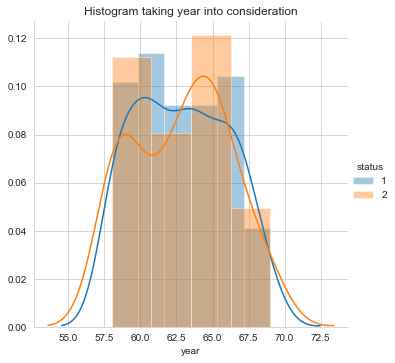

In [118]:
#Plotting histogram taking year into consideration

sns.FacetGrid(Haber, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram taking year into consideration")
plt.show();

#### 1)We cant classify using the above plot.
#### 2)But from the above histogram's we find that we can classify majority of the points by taking "nodes" as a feature and by plotting PDF and CDF for the same.
#### 3)We are in need of PDF & CDF to figure out the percentage and probability count of each feature.

#### 1.8 Plotting the PDF and CDF on the entire dataset taking age as a feature.

The pdf is : [0.11111111 0.23856209 0.29411765 0.23202614 0.10784314 0.01633987]
The bin edges of pdf are: [30.         38.83333333 47.66666667 56.5        65.33333333 74.16666667
 83.        ]
The CDF is : [0.11111111 0.3496732  0.64379085 0.87581699 0.98366013 1.        ]


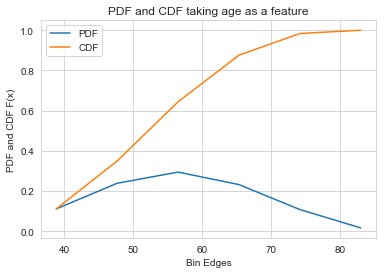

In [119]:
#Plotting the PDF and CDF on the entire dataset taking age as a feature.
counts, bin_edges = np.histogram(Haber['age'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))

print("The pdf is :",pdf);
print("The bin edges of pdf are:",bin_edges);
cdf = np.cumsum(pdf)
print("The CDF is :",cdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.title('PDF and CDF taking age as a feature')
plt.xlabel("Bin Edges")
plt.ylabel("PDF and CDF F(x)")
plt.legend()

#### From PDF we can say
#### The probability of finding a 38-39 year old patient is 11%.
#### The probability of finding a 47-48 year old patient is 24%.
#### The probability of finding a 56-57 year old patient is 29%.
#### The prbability of finding a 64-65 year old patient is 23%.
#### The probability of finding a 73-74 year old patient is 10%.
#### The probability of finding a 83 year old patient is 2%.

#### From the CDF we can say
#### 11% of the patients fall under the age group of 38-39.
#### 35% of theof the patients fall under the age group of 47-48. 
#### 64% of the patients fall under the age group of 56-57.
#### 88% of theof the patients fall under the age group of 65-66. 
#### 98% of the patients fall under the age group of 74-75.
#### 100% of the patients fall under the age group of 83.


#### 1.9 Plot of PDF and CDF for  both the status classes separately taking "nodes" as a feature.

The pdf1 is : [0.86222222 0.07555556 0.03111111 0.01777778 0.00888889 0.
 0.00444444]
The bin edges1 of pdf1 are: [ 0.          6.57142857 13.14285714 19.71428571 26.28571429 32.85714286
 39.42857143 46.        ]
The CDF1 is : [0.86222222 0.93777778 0.96888889 0.98666667 0.99555556 0.99555556
 1.        ]
The pdf2 is : [0.62962963 0.19753086 0.09876543 0.04938272 0.01234568 0.
 0.01234568]
The bin edges2 of pdf2 are: [ 0.          7.42857143 14.85714286 22.28571429 29.71428571 37.14285714
 44.57142857 52.        ]
The CDF2 is : [0.62962963 0.82716049 0.92592593 0.97530864 0.98765432 0.98765432
 1.        ]


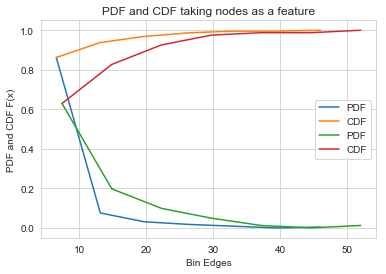

In [120]:
# Plot of PDF and CDF for  both the status classes separately taking "nodes" as a feature.
#Separating the two Statuses and then plotting the PDF and CDF will give us better insights about the data.

# Status_1

counts1, bin_edges1 = np.histogram(Haber_S1['nodes'], bins=7, 
                                 density = True)
pdf1 = counts1/(sum(counts1))
print("The pdf1 is :",pdf1);
print("The bin edges1 of pdf1 are:",bin_edges1);
cdf1 = np.cumsum(pdf1)
print("The CDF1 is :",cdf1)
plt.plot(bin_edges1[1:],pdf1,label="PDF")
plt.plot(bin_edges1[1:], cdf1,label="CDF")
plt.title('PDF and CDF taking nodes as a feature')

# Status_2

counts2, bin_edges2 = np.histogram(Haber_S2['nodes'], bins=7, 
                               density = True)
pdf2 = counts2/(sum(counts2))
print("The pdf2 is :",pdf2);
print("The bin edges2 of pdf2 are:",bin_edges2);
cdf2 = np.cumsum(pdf2)
print("The CDF2 is :",cdf2)
plt.plot(bin_edges2[1:],pdf2,label="PDF")
plt.plot(bin_edges2[1:], cdf2,label="CDF")
plt.title('PDF and CDF taking nodes as a feature')
plt.xlabel("Bin Edges")
plt.ylabel("PDF and CDF F(x)")
plt.legend()
plt.show();

#### 1)We can see pdf's and the cdf's for both the statuses above wrt nodes as a feature.
#### 2)Lets print the percentages and the probability counts obtained from the PDF's and the CDF's.

#### Lets print the inference of the PDF and CDF

In [121]:

print("CDF1 of Patients who survived for >=5years from the graph-Orange line \n")
print(round(cdf1[0]*100,2),"% of the patients with <=",round(bin_edges1[1],2),"nodes")
print(round(cdf1[1]*100,2),"% of the patients with <=",round(bin_edges1[2],2),"nodes")
print(round(cdf1[2]*100,2),"% of the patients with <=",round(bin_edges1[3],2),"nodes")
print(round(cdf1[3]*100,2),"% of the patients with <=",round(bin_edges1[4],2),"nodes")
print(round(cdf1[4]*100,2),"% of the patients with <=",round(bin_edges1[5],2),"nodes")
print(round(cdf1[5]*100,2),"% of the patients with <=",round(bin_edges1[6],2),"nodes")
print(round(cdf1[6]*100,2),"% of the patients with <=",round(bin_edges1[7],2),"nodes \n")

print("PDF1 of Patients who survived for >=5years from the graph-Blue line \n")
print("The probability of finding",round(bin_edges1[1],2),"nodes in a patient is",round(pdf1[0]*100,2),"%")
print("The probability of finding",round(bin_edges1[2],2),"nodes in a patient is",round(pdf1[1]*100,2),"%")
print("The probability of finding",round(bin_edges1[3],2),"nodes in a patient is",round(pdf1[2]*100,2),"%")
print("The probability of finding",round(bin_edges1[4],2),"nodes in a patient is",round(pdf1[3]*100,2),"%")
print("The probability of finding",round(bin_edges1[5],2),"nodes in a patient is",round(pdf1[4]*100,2),"%")
print("The probability of finding",round(bin_edges1[6],2),"nodes in a patient is",round(pdf1[5]*100,2),"%")
print("The probability of finding",round(bin_edges1[7],2),"nodes in a patient is",round(pdf1[6]*100,2),"% \n")

print("CDF2 of Patients who survived for <5years from the graph-Red line \n")
print(round(cdf2[0]*100,2),"% of the patients with <=",round(bin_edges2[1],2),"nodes")
print(round(cdf2[1]*100,2),"% of the patients with <=",round(bin_edges2[2],2),"nodes")
print(round(cdf2[2]*100,2),"% of the patients with <=",round(bin_edges2[3],2),"nodes")
print(round(cdf2[3]*100,2),"% of the patients with <=",round(bin_edges2[4],2),"nodes")
print(round(cdf2[4]*100,2),"% of the patients with <=",round(bin_edges2[5],2),"nodes")
print(round(cdf2[5]*100,2),"% of the patients with <=",round(bin_edges2[6],2),"nodes")
print(round(cdf2[6]*100,2),"% of the patients with <=",round(bin_edges2[7],2),"nodes \n")

print("PDF2 of Patients who survived for <5years from the graph-Green line \n")
print("The probability of finding",round(bin_edges2[1],2),"nodes in a patient is",round(pdf2[0]*100,2),"%")
print("The probability of finding",round(bin_edges2[2],2),"nodes in a patient is",round(pdf2[1]*100,2),"%")
print("The probability of finding",round(bin_edges2[3],2),"nodes in a patient is",round(pdf2[2]*100,2),"%")
print("The probability of finding",round(bin_edges2[4],2),"nodes in a patient is",round(pdf2[3]*100,2),"%")
print("The probability of finding",round(bin_edges2[5],2),"nodes in a patient is",round(pdf2[4]*100,2),"%")
print("The probability of finding",round(bin_edges2[6],2),"nodes in a patient is",round(pdf2[5]*100,2),"%")
print("The probability of finding",round(bin_edges2[7],2),"nodes in a patient is",round(pdf2[6]*100,2),"% \n")

CDF1 of Patients who survived for >=5years from the graph-Orange line 

86.22 % of the patients with <= 6.57 nodes
93.78 % of the patients with <= 13.14 nodes
96.89 % of the patients with <= 19.71 nodes
98.67 % of the patients with <= 26.29 nodes
99.56 % of the patients with <= 32.86 nodes
99.56 % of the patients with <= 39.43 nodes
100.0 % of the patients with <= 46.0 nodes 

PDF1 of Patients who survived for >=5years from the graph-Blue line 

The probability of finding 6.57 nodes in a patient is 86.22 %
The probability of finding 13.14 nodes in a patient is 7.56 %
The probability of finding 19.71 nodes in a patient is 3.11 %
The probability of finding 26.29 nodes in a patient is 1.78 %
The probability of finding 32.86 nodes in a patient is 0.89 %
The probability of finding 39.43 nodes in a patient is 0.0 %
The probability of finding 46.0 nodes in a patient is 0.44 % 

CDF2 of Patients who survived for <5years from the graph-Red line 

62.96 % of the patients with <= 7.43 nodes
82.72

##### 2.0 Mean, Variance, Std-deviation for "age' and 'nodes" feature

In [122]:
#Mean, Variance, Std-deviation for "age' and 'nodes" feature
print("Means_age:")
print(np.mean(Haber["age"]))
#Mean with an outlier.
print(np.mean(np.append(Haber["age"],50)));

print("\nStd-dev_age:");
print(np.std(Haber["age"]))

print(" \n Means_nodes:")
print(np.mean(Haber["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(Haber["nodes"],50)));


print("\nStd-dev_nodes:");
print(np.std(Haber["nodes"]))


Means_age:
52.45751633986928
52.44951140065147

Std-dev_age:
10.785785203631836
 
 Means_nodes:
4.026143790849673
4.175895765472313

Std-dev_nodes:
7.177896092811148


#### 2.1 Median, Quantiles, Percentiles, MAD for all the features

In [123]:
#Median, Quantiles, Percentiles, MAD for all the features
print("\nMedians_S1_age:")
print(np.median(Haber_S1["age"]))
#Median with an outlier
print(np.median(np.append(Haber_S1["age"],100)));
print("\nMedians_S1_nodes:")
print(np.median(Haber_S1["nodes"]))
#Median with an outlier
print(np.median(np.append(Haber_S1["nodes"],100)));

print("\nMedians_S1_year:")
print(np.median(Haber_S1["year"]))
#Median with an outlier
print(np.median(np.append(Haber_S1["year"],100)));

print("\nMedians_S2_age:")
print(np.median(Haber_S2["age"]))
#Median with an outlier
print(np.median(np.append(Haber_S2["age"],100)));

print("\nMedians_S2_nodes:")
print(np.median(Haber_S2["nodes"]))
#Median with an outlier
print(np.median(np.append(Haber_S2["nodes"],100)));

print("\nMedians_S2_year:")
print(np.median(Haber_S2["year"]))
#Median with an outlier
print(np.median(np.append(Haber_S2["year"],100)));


print("\nQuantiles_S1_age:")
print(np.percentile(Haber_S1["age"],np.arange(0, 100, 25)))
print("\nQuantiles_S2_age:")
print(np.percentile(Haber_S2["age"],np.arange(0, 100, 25)))

print("\nQuantiles_S1_nodes:")
print(np.percentile(Haber_S1["nodes"],np.arange(0, 100, 25)))
print("\nQuantiles_S2_nodes:")
print(np.percentile(Haber_S2["nodes"],np.arange(0, 100, 25)))

print("\nQuantiles_S1_year:")
print(np.percentile(Haber_S1["year"],np.arange(0, 100, 25)))
print("\nQuantiles_S2_year:")
print(np.percentile(Haber_S2["year"],np.arange(0, 100, 25)))


print("\n90th Percentiles_S1_age:")
print(np.percentile(Haber_S1["age"],90))
print("\n90th Percentiles_S2_age:")
print(np.percentile(Haber_S2["age"],90))

print("\n90th Percentiles_S1_nodes:")
print(np.percentile(Haber_S1["nodes"],90))
print("\n90th Percentiles_S2_nodes:")
print(np.percentile(Haber_S2["nodes"],90))

print("\n90th Percentiles_S1_year:")
print(np.percentile(Haber_S1["year"],90))
print("\n90th Percentiles_S2_year:")
print(np.percentile(Haber_S2["year"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation_S1_age")
print(robust.mad(Haber_S1["age"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation_S2_age")
print(robust.mad(Haber_S2["age"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation_S1_nodes")
print(robust.mad(Haber_S1["nodes"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation_S2_nodes")
print(robust.mad(Haber_S2["nodes"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation_S1_year")
print(robust.mad(Haber_S1["year"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation_S2_year")
print(robust.mad(Haber_S2["year"]))



Medians_S1_age:
52.0
52.0

Medians_S1_nodes:
0.0
0.0

Medians_S1_year:
63.0
63.0

Medians_S2_age:
53.0
53.0

Medians_S2_nodes:
4.0
4.0

Medians_S2_year:
63.0
63.0

Quantiles_S1_age:
[30. 43. 52. 60.]

Quantiles_S2_age:
[34. 46. 53. 61.]

Quantiles_S1_nodes:
[0. 0. 0. 3.]

Quantiles_S2_nodes:
[ 0.  1.  4. 11.]

Quantiles_S1_year:
[58. 60. 63. 66.]

Quantiles_S2_year:
[58. 59. 63. 65.]

90th Percentiles_S1_age:
67.0

90th Percentiles_S2_age:
67.0

90th Percentiles_S1_nodes:
8.0

90th Percentiles_S2_nodes:
20.0

90th Percentiles_S1_year:
67.0

90th Percentiles_S2_year:
67.0

Median Absolute Deviation_S1_age
13.343419966550417

Median Absolute Deviation_S2_age
11.860817748044816

Median Absolute Deviation_S1_nodes
0.0

Median Absolute Deviation_S2_nodes
5.930408874022408

Median Absolute Deviation_S1_year
4.447806655516806

Median Absolute Deviation_S2_year
4.447806655516806


#### By taking age as a feature lets analyze quantiles
#### We have the median of age to be 52 inspite of adding an outlier.
#### Status_1
#### From the 1st quantile we can State that <=25 percentage of people are having age <=43
#### From the 2nd quantile we can State that <=50 percentage of people are having age  <=52
#### From the 3rd quantile we can State that <=75 percentage of people are having age  <=60
#### From the 4th quantile we can State that remaining 25 percentage of people are having age  >=60 and <=83.

#### Status_2
#### From the 1st quantile we can state that <=25 percentage of people are having age <=46
#### From the 2nd quantile we can state that <=50 percentage of people are having age  <=53
#### From the 3rd quantile we can state that <=75 percentage of people are having age  <=61
#### From the 4th quantile we can state that remaining 25 percentage of people are having age  >=61 and <=83.

#### Nodes
#### From the 90th percentile we can state that 90 percent of the patients who lived for >=5yrs had <8 nodes.
#### From the 90th percentile we can state that 90 percent of the patients who lived for <5yrs had <20 nodes.

#### We will consider quantiles by taking each feature into consideration during the boxplot analysis.

#### 2.2 Box-plot with whiskers taking age,node and year variable

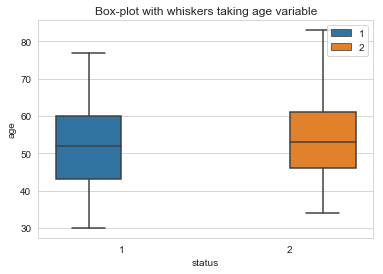

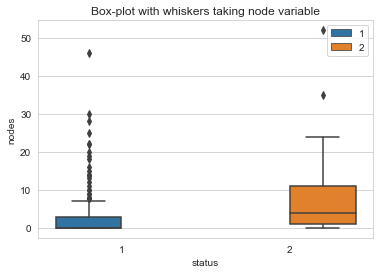

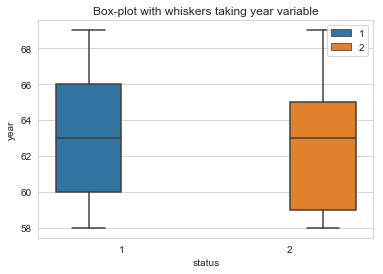

In [124]:
#A Box plot will help us get the graphical view of the quantiles.    
#Box-plot1
g=sns.boxplot(x='status',y='age',hue='status',data=Haber)
plt.title("Box-plot with whiskers taking age variable")
plt.legend(loc=1)
plt.show()
#Box-plot2
sns.boxplot(x='status',y='nodes',hue='status',data=Haber)
plt.title("Box-plot with whiskers taking node variable")
plt.legend(loc=1)
plt.show()
#Box-plot3
sns.boxplot(x='status',y='year',hue='status', data=Haber)
plt.title("Box-plot with whiskers taking year variable")
plt.legend(loc=1)
plt.show()


#### NOTE: In the above plot, a technique called inter-quartile range is used in plotting the whiskers. 
#### Whiskers in the plot below donot correposnd to the min and max values.
#### Whiskers are calculated as follows 
#### IQR=Q3-Q1
#### Upper whisker=min(max value of data set ,Q3+1.5*IQR)
#### Lower Whisker=max(min value of data set,Q1-1.5*IQR)

#### Observation of Boxplots with whiskers

#### Box Plot1

#### 50% of the patients who lived for >=5 yrs post operation are in the age group between 43-60.
#### 50% of the patients who lived for <5 yrs post operation fall in the age group between 46-61

#### Box Plot2

#### 50% of the patients who lived for <5yrs post operation had 1-11 lymph nodes.
#### Remaining 25% of the patients who lived for <5yrs post operation had >=11 lymph nodes.
#### Remaining 25% of the patients who lived for <5yrs post operation had <=1 lymph nodes.
#### 75% of the people who lived for >=5yrs post operation had <=3 lymph nodes.
#### 50% of the people who lived for >=5yrs post operation had 0 lymph nodes.

#### Box Plot3

#### In operations conducted between 1965-1969, 33.33% of the patients who lived for >=5yrs existed\
#### whereas only 25% of the patients who lived for <5yrs existed.

#### In operations conducted between 1958-1960, 31.25% of the patients who lived for <5yrs existed\
#### whereas only 25% of the patients who lived for >=5yrs existed.

#### We can note 
#### The percentage of survival rate of patients who lived for <5yrs was higher in the first 3yrs of operation as compared to patients who lived for >=5yrs. 
#### Whereas percentage of survival rate of patients who lived for >=5 in the last 5 years of the operations  was higher as compared to patients who lived for <5yrs.

#### 2.3 Violin plot with quartile markers taking age,node and year variable.

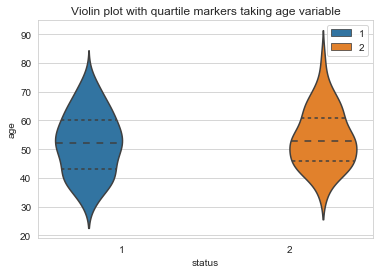

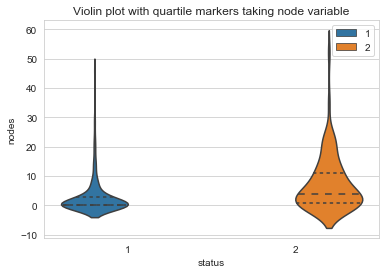

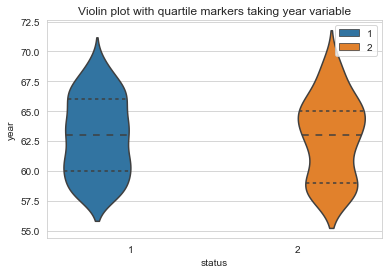

In [125]:
# A violin plot combines the benefits of the previous plots 
#and simplifies them

#Voilin Plot1
sns.violinplot(x="status", y="age",hue='status', data=Haber, size=8,inner="quartiles")
plt.title("Violin plot with quartile markers taking age variable")
plt.legend(loc=0)
plt.show()
#Voilin Plot2
sns.violinplot(x="status", y="nodes",hue='status', data=Haber, size=8,inner="quartiles")
plt.title("Violin plot with quartile markers taking node variable")
plt.legend(loc=1)
plt.show()
#Voilin Plot3
sns.violinplot(x="status", y="year",hue='status', data=Haber, size=8,inner="quartiles")
plt.title("Violin plot with quartile markers taking year variable")
plt.legend(loc=1)
plt.show()

#### Observation:

#### Voilin Plot1
#### Higher probability of patients between age 43-60 lived for >=5 years post operation as compared to patients who lived for <5 yrs.

#### Higher probability of patients between age 46-53 lived for <5 years post operation as compared to patients who lived for >=5 yrs.


#### Voilin Plot2
#### Higher probability of patients who lived for >=5 yrs post operation had <3 nodes.
#### Higher probability of patients who lived for <5 yrs post operation had >=4 nodes.


#### Voilin Plot3
#### Higher probability of patients survived for <5 yrs between 1958-1960. 
#### Higher probability of patients survived for >=5 yrs between 1962-1966. 

#### 2.4 Multivariate Probability Density Contour Plot

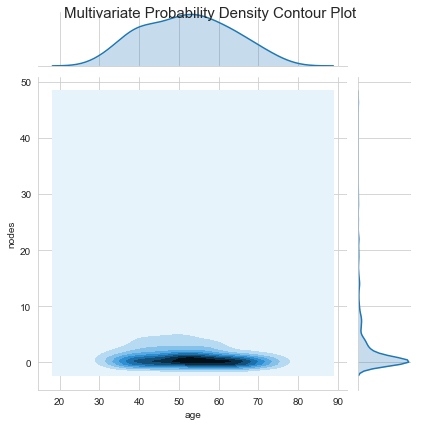

In [126]:
# Multivariate Probability Density Contour Plot
a=sns.jointplot(x="age", y="nodes", data=Haber_S1, kind="kde");
a.fig.suptitle("Multivariate Probability Density Contour Plot",fontsize=15)
# plt.title("Multivariate Analysis")
plt.show();

#### We can say from the plot that majority of patients falling between age group 43-60 and having <=3 nodes survived for >=5 years.


#### SUMMARY of the project:
#### 1)From the Pairplots we realised that taking node and age feature we could get better insights about the data.
#### 2)By plotting histogram we could see that node feature will help us classify the data.
#### 3)And hence to quantify the plots we had to plot pdf and cdf by separating the status class wrt 1 and 2 and then get the numbers.

#### Status1
#### 1)From CDF1 86 % of the patients who lived for >=5yrs post operation had <= 7 nodes.
#### 2)And from the 90th percentile we can state that 90 percent of the patients who lived for >=5yrs had <8 nodes.
#### 3)From quantiles/Boxplot 75% of the people who lived for >=5yrs post operation had <=3 lymph nodes.
#### 4)From quantiles/Boxplot 50% of the people who lived for >=5yrs post operation had 0 lymph nodes.

#### Status2
#### 1)From CDF2 63 % of the patients who lived for <5yrs post operation had <= 7 nodes.
#### 2)And from the 3rd quantile we can state that <=75 percentage of people are having <=11 nodes.
#### 3)From quantiles/Boxplot 50% of the patients who lived for <5yrs post operation had 1-11 lymph nodes.
#### 4)From quantiles/Boxplot remaining 25% of the patients who lived for <5yrs post operation had >=11 lymph nodes.
#### 5)From quantiles/Boxplot remaining 25% of the patients who lived for <5yrs post operation had <=1 lymph nodes.

#### From Years Boxplot

#### 1)In operations conducted between 1965-1969 over a span of 5yrs, 33.33% of the patients who lived for >=5yrs existed whereas only 25% of the patients who lived for <5yrs existed.

#### 2)In operations conducted between 1958-1960 over a span of 3yrs, 31.25% of the patients who lived for <5yrs existed whereas only 25% of the patients who lived for >=5yrs existed.

#### 3)Also from the years Boxlot we can say that as the years passed by, the percentage of survival rate got increased.
